# Análise Exploratória dos Dados

## Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime

sns.set_theme(style="whitegrid")

## Leitura dos Dados

In [5]:
df = pd.read_csv("data\dataset_cadastro_cursos.csv", parse_dates=["data_sessao"])

df.head()


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\lucas\AppData\Local\Temp\ipykernel_40260\599201947.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("data\dataset_cadastro_cursos.csv", parse_dates=["data_sessao"])


,user_id,session_id,data_sessao,origem_trafego,tempo_na_pagina,scroll_perc,clicks_cta,cadastro_realizado
0,6300,sess_375469,2024-02-14,Pago,260.04,49.24,2,0
1,2103,sess_280013,2024-02-07,Orgânico,113.24,66.03,1,0
2,3619,sess_321446,2024-02-14,Orgânico,121.45,78.99,2,0
3,6967,sess_311480,2024-01-02,Direto,149.76,86.56,1,1
4,3522,sess_760659,2024-01-20,Pago,176.73,76.00,0,0


## Infos Gerais dos Dados

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   user_id             500000 non-null  int64         
 1   session_id          500000 non-null  object        
 2   data_sessao         500000 non-null  datetime64[ns]
 3   origem_trafego      500000 non-null  object        
 4   tempo_na_pagina     500000 non-null  float64       
 5   scroll_perc         500000 non-null  float64       
 6   clicks_cta          500000 non-null  int64         
 7   cadastro_realizado  500000 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 30.5+ MB


In [8]:
df.describe()

,user_id,data_sessao,tempo_na_pagina,scroll_perc,clicks_cta,cadastro_realizado
count,500000.000000,500000,500000.000000,500000.000000,500000.000000,500000.000000
mean,5506.871138,2024-01-30 12:32:47.155199488,157.661779,73.342500,1.348086,0.205272
min,1000.000000,2024-01-01 00:00:00,10.000000,0.000000,0.000000,0.000000
25%,3251.750000,2024-01-16 00:00:00,116.040000,62.580000,0.000000,0.000000
50%,5515.000000,2024-01-31 00:00:00,157.380000,73.530000,1.000000,0.000000
75%,7760.000000,2024-02-15 00:00:00,198.850000,84.700000,2.000000,0.000000
max,9999.000000,2024-02-29 00:00:00,457.150000,100.000000,10.000000,1.000000
std,2599.977614,NaN,60.912540,15.535734,1.190012,0.403901


In [9]:
df.isnull().sum()

user_id               0
session_id            0
data_sessao           0
origem_trafego        0
tempo_na_pagina       0
scroll_perc           0
clicks_cta            0
cadastro_realizado    0
dtype: int64

## Análises Gerais

In [ ]:
taxa_conversao_total = df['cadastro_realizado'].mean()
print(f"Taxa de conversão total: {taxa_conversao_total:.2%}")

Taxa de conversão total: 20.53%


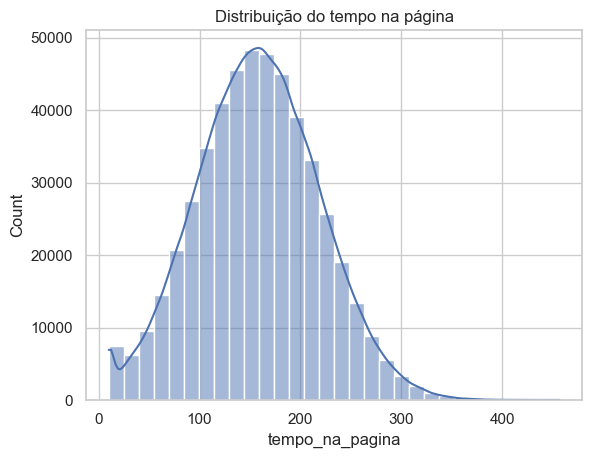

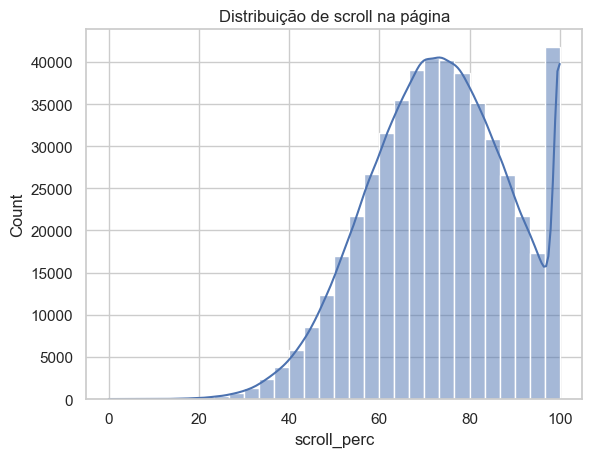

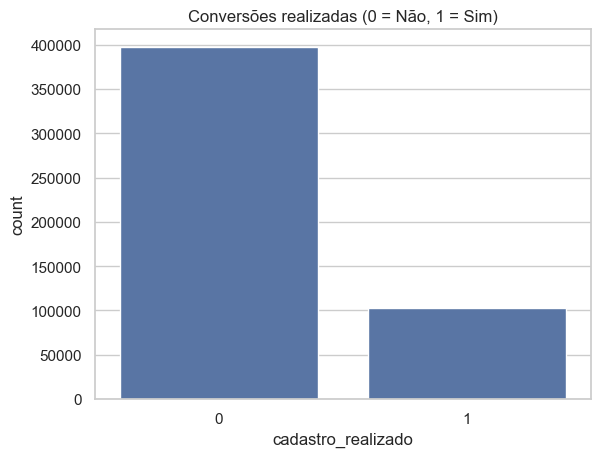

In [11]:
sns.histplot(df['tempo_na_pagina'], bins=30, kde=True)
plt.title("Distribuição do tempo na página")
plt.show()

sns.histplot(df['scroll_perc'], bins=30, kde=True)
plt.title("Distribuição de scroll na página")
plt.show()

sns.countplot(x='cadastro_realizado', data=df)
plt.title("Conversões realizadas (0 = Não, 1 = Sim)")
plt.show()


## Análise comparativa após mudança

In [12]:
data_mudanca = pd.to_datetime("2024-02-15")
df['antes_depois'] = np.where(df['data_sessao'] < data_mudanca, 'Antes', 'Depois')

In [17]:
df.groupby('antes_depois')['cadastro_realizado'].mean()

antes_depois
Antes     0.180703
Depois    0.278955
Name: cadastro_realizado, dtype: float64

In [15]:
df.groupby('antes_depois')['tempo_na_pagina'].mean()

antes_depois
Antes     150.253395
Depois    179.879583
Name: tempo_na_pagina, dtype: float64

In [16]:
df.groupby('antes_depois')['scroll_perc'].mean()

antes_depois
Antes     69.863107
Depois    83.777230
Name: scroll_perc, dtype: float64

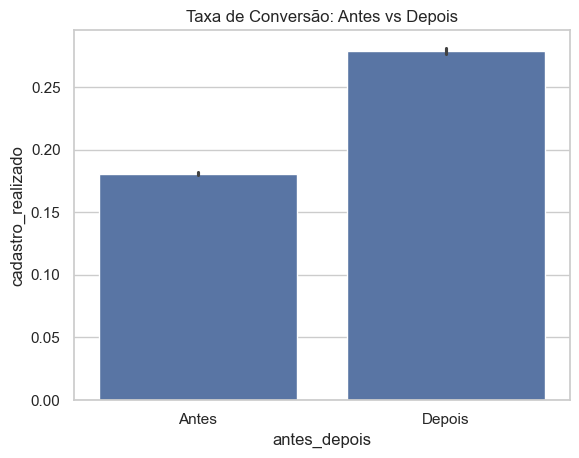

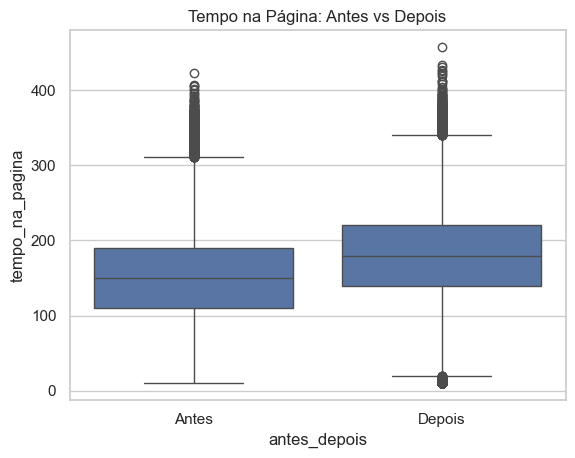

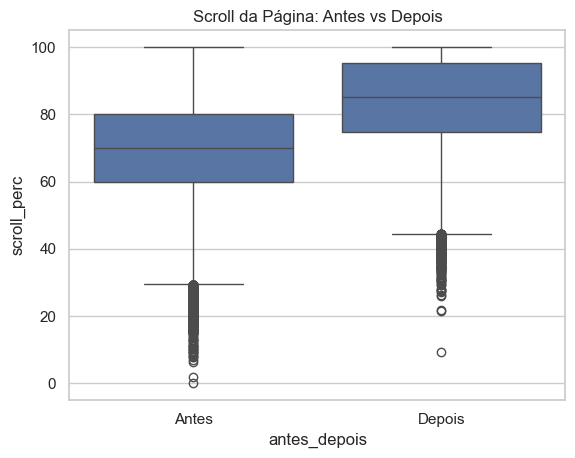

In [18]:
sns.barplot(data=df, x='antes_depois', y='cadastro_realizado')
plt.title("Taxa de Conversão: Antes vs Depois")
plt.show()

sns.boxplot(data=df, x='antes_depois', y='tempo_na_pagina')
plt.title("Tempo na Página: Antes vs Depois")
plt.show()

sns.boxplot(data=df, x='antes_depois', y='scroll_perc')
plt.title("Scroll da Página: Antes vs Depois")
plt.show()
